In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

# Helper Functions to Generate and Plot Data

In [4]:
# Generate some fake data to test with
def gendata(loc=0):
    population = stats.norm.rvs(size=1000, random_state=42)
    sample = stats.norm.rvs(loc=loc, size=200, random_state=42)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

# One Sample T-Tests

One Sample t-tests allow you to compare your sample mean to the population mean.

### Assumptions

1. Data is normally distributed
2. Data is independent
3. Data is randomly sampled

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html

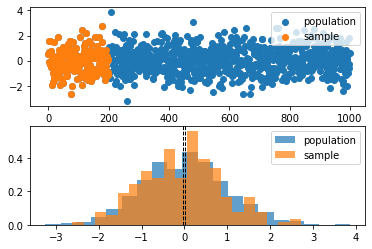

In [5]:
# Generate some data and show the scatter plot
population, sample = gendata()

In [6]:
# Hø (null hypothesis): µ(s) = µ(p)
# Ha (alternative): µ(s) != µ(p)

# p-value > 0.05, so we fail to reject the null hypothesis Hø
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-0.912976906342992, pvalue=0.362359438860515)

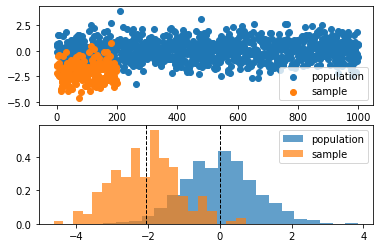

In [7]:
# Generate data with a bigger difference in means
population, sample = gendata(loc=-2)

In [8]:
# Hø (null hypothesis): µ(s) = µ(p)
# Ha (alternative): µ(s) != µ(p)

# p-value <= 0.05, so we reject the null hypothesis Hø in favor of Ha

stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-31.293376800980507, pvalue=8.680069844900927e-79)